In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [2]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-Data301022.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
cycleZ = pd.read_csv("Data/Chickens data/CycleZ-Data101122.csv", sep=";")
temperature_data = pd.read_csv("Data/Meteorological data/temperature_goito.csv", sep=",")
rain_data = pd.read_csv("Data/Meteorological data/rain_goito.csv", sep=",")
humidity_data = pd.read_csv("Data/Meteorological data/humidity_ponte_sul_mincio.csv", sep=",")

## Data cleaning

In [3]:
# removing rows with Nan values from chickens data
cycleA = cycleA.dropna()
cycleB = cycleB.dropna()
cycleZ = cycleB.dropna()

# removing rows with non valid data from temperature_data
temperature_data = temperature_data[temperature_data["Avg_temp_value"] != -999.0]

# removing rows with non valid data from humidity_data
humidity_data = humidity_data[humidity_data["Avg_humidity_value"] != -999.0]

# removing "%" value from chickens data
cycleA["% laied"] = cycleA["% laied"].str.rstrip("%").astype(float)
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)
cycleZ["% laied"] = cycleZ["% laied"].str.rstrip("%").astype(float)

# modifying data format of chickens data for uniformity: YYYY/MM/DD
cycleA['Arrival Chickens Date'] = pd.to_datetime(cycleA["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Laid'] = pd.to_datetime(cycleA["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Selling'] = pd.to_datetime(cycleA["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleZ['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')

## Data preview

### Cycle A

In [4]:
cycleA.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
11,2018/07/19,4.0,42123.0,2018/08/18,0,0.00,86.5,71.5,2018/08/18,43200,0
16,2018/07/19,12.0,42071.0,2018/08/23,21660,51.48,89.5,74.5,2018/08/23,43200,0
20,2018/07/19,6.0,42049.0,2018/08/27,26370,62.71,94.0,87.5,2018/08/27,97680,0
23,2018/07/19,7.0,42031.0,2018/08/30,26270,62.50,100.0,87.0,2018/08/30,79710,0
24,2018/07/19,6.0,42025.0,2018/08/31,25920,61.68,101.5,89.5,2018/08/31,25050,0


### Cycle B

In [5]:
cycleB.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,2020/08/09,1.0,42215.0,2020/09/04,1470.0,3.48,110.0,81.0,2020/09/04,1470.0,0.0
6,2020/08/09,3.0,42209.0,2020/09/10,0.0,0.00,106.0,83.0,2020/09/10,31140.0,0.0
12,2020/08/09,8.0,42196.0,2020/09/16,23670.0,56.10,117.0,90.0,2020/09/16,120420.0,0.0
13,2020/08/09,6.0,42190.0,2020/09/17,25920.0,61.44,118.0,99.0,2020/09/17,25050.0,0.0
14,2020/08/09,2.0,42188.0,2020/09/18,27450.0,65.07,113.0,94.0,2020/09/18,26610.0,0.0


### Cycle Z

In [6]:
cycleZ.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,2020/08/09,1.0,42215.0,2020/09/04,1470.0,3.48,110.0,81.0,2020/09/04,1470.0,0.0
6,2020/08/09,3.0,42209.0,2020/09/10,0.0,0.00,106.0,83.0,2020/09/10,31140.0,0.0
12,2020/08/09,8.0,42196.0,2020/09/16,23670.0,56.10,117.0,90.0,2020/09/16,120420.0,0.0
13,2020/08/09,6.0,42190.0,2020/09/17,25920.0,61.44,118.0,99.0,2020/09/17,25050.0,0.0
14,2020/08/09,2.0,42188.0,2020/09/18,27450.0,65.07,113.0,94.0,2020/09/18,26610.0,0.0


### Temperature data

In [7]:
temperature_data.head()

,Sensor_ID,Date,Avg_temp_value,Min_temp_value,Max_temp_value
0,9025,2014/01/01,2.8,-1.7,8.7
1,9025,2014/01/02,4.1,3.0,5.1
2,9025,2014/01/03,4.7,3.7,5.8
3,9025,2014/01/04,6.0,4.8,7.7
4,9025,2014/01/05,6.8,5.6,8.2


### Humidity data

In [8]:
humidity_data.head()

,Sensor_ID,Date,Avg_humidity_value,Min_humidity_value,Max_humidity_value
0,7047,2014/01/01,70.5,38.8,88.5
1,7047,2014/01/02,85.9,67.4,99.9
2,7047,2014/01/03,99.9,99.9,99.9
3,7047,2014/01/04,99.9,99.9,99.9
4,7047,2014/01/05,99.9,99.9,99.9


## Data join: chicken's data with meteorological data

In [9]:
temp_join_chickens_a = pd.merge(cycleA, temperature_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_a = pd.merge(temp_join_chickens_a, humidity_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_a = temp_hum_chickens_a.drop(['Date_x', 'Date_y', 'Sensor_ID_x', 'Sensor_ID_y'], axis=1)

temp_join_chickens_b = pd.merge(cycleB, temperature_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_b = pd.merge(temp_join_chickens_b, humidity_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_b = temp_hum_chickens_b.drop(['Date_x', 'Date_y', 'Sensor_ID_x', 'Sensor_ID_y'], axis=1)


temp_join_chickens_z = pd.merge(cycleZ, temperature_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_z = pd.merge(temp_join_chickens_z, humidity_data, left_on='Date of Laid', right_on='Date', how='inner')
temp_hum_chickens_z = temp_hum_chickens_z.drop(['Date_x', 'Date_y', 'Sensor_ID_x', 'Sensor_ID_y'], axis=1)

## Data normalization

In [10]:
# apply min-max normalization techniques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in temp_hum_chickens_a:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
        temp_hum_chickens_a[column] = scaler.fit_transform(temp_hum_chickens_a[column].values.reshape(-1, 1))
        # (weather_join_chickens_a[column] - weather_join_chickens_a[column].min()) / (weather_join_chickens_a[column].max() - weather_join_chickens_a[column].min())
        
for column in temp_hum_chickens_b:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
        temp_hum_chickens_b[column] = scaler.fit_transform(temp_hum_chickens_b[column].values.reshape(-1, 1))
        # (weather_join_chickens_b[column] - weather_join_chickens_b[column].min()) / (weather_join_chickens_b[column].max() - weather_join_chickens_b[column].min())
for column in temp_hum_chickens_z:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
        temp_hum_chickens_z[column] = scaler.fit_transform(temp_hum_chickens_z[column].values.reshape(-1, 1))
        # (weather_join_chickens_b[column] - weather_join_chickens_b[column].min()) / (weather_join_chickens_b[column].max() - weather_join_chickens_b[column].min())

## Data inspection

### Choosing features

In [11]:
# input (x) and output (y) features
every_feature = temp_hum_chickens_a.columns
no_dates_fetures = [        'Chickens Death Per Day', 'Current Chickens','# of Eggs', '% laied', 'Water Consumption (gr)',
                            'Feed Consumption (gr)',
                            '# Eggs sold (First quality)', '# Eggs sold (Second quality)',
                            'Avg_temp_value', 'Min_temp_value', 'Max_temp_value',
                            'Avg_humidity_value', 'Min_humidity_value', 'Max_humidity_value']
input_features = ['Water Consumption (gr)', 'Feed Consumption (gr)', 'Avg_temp_value', 'Avg_humidity_value']
output_features = ['Chickens Death Per Day','# of Eggs']

### Cycle A

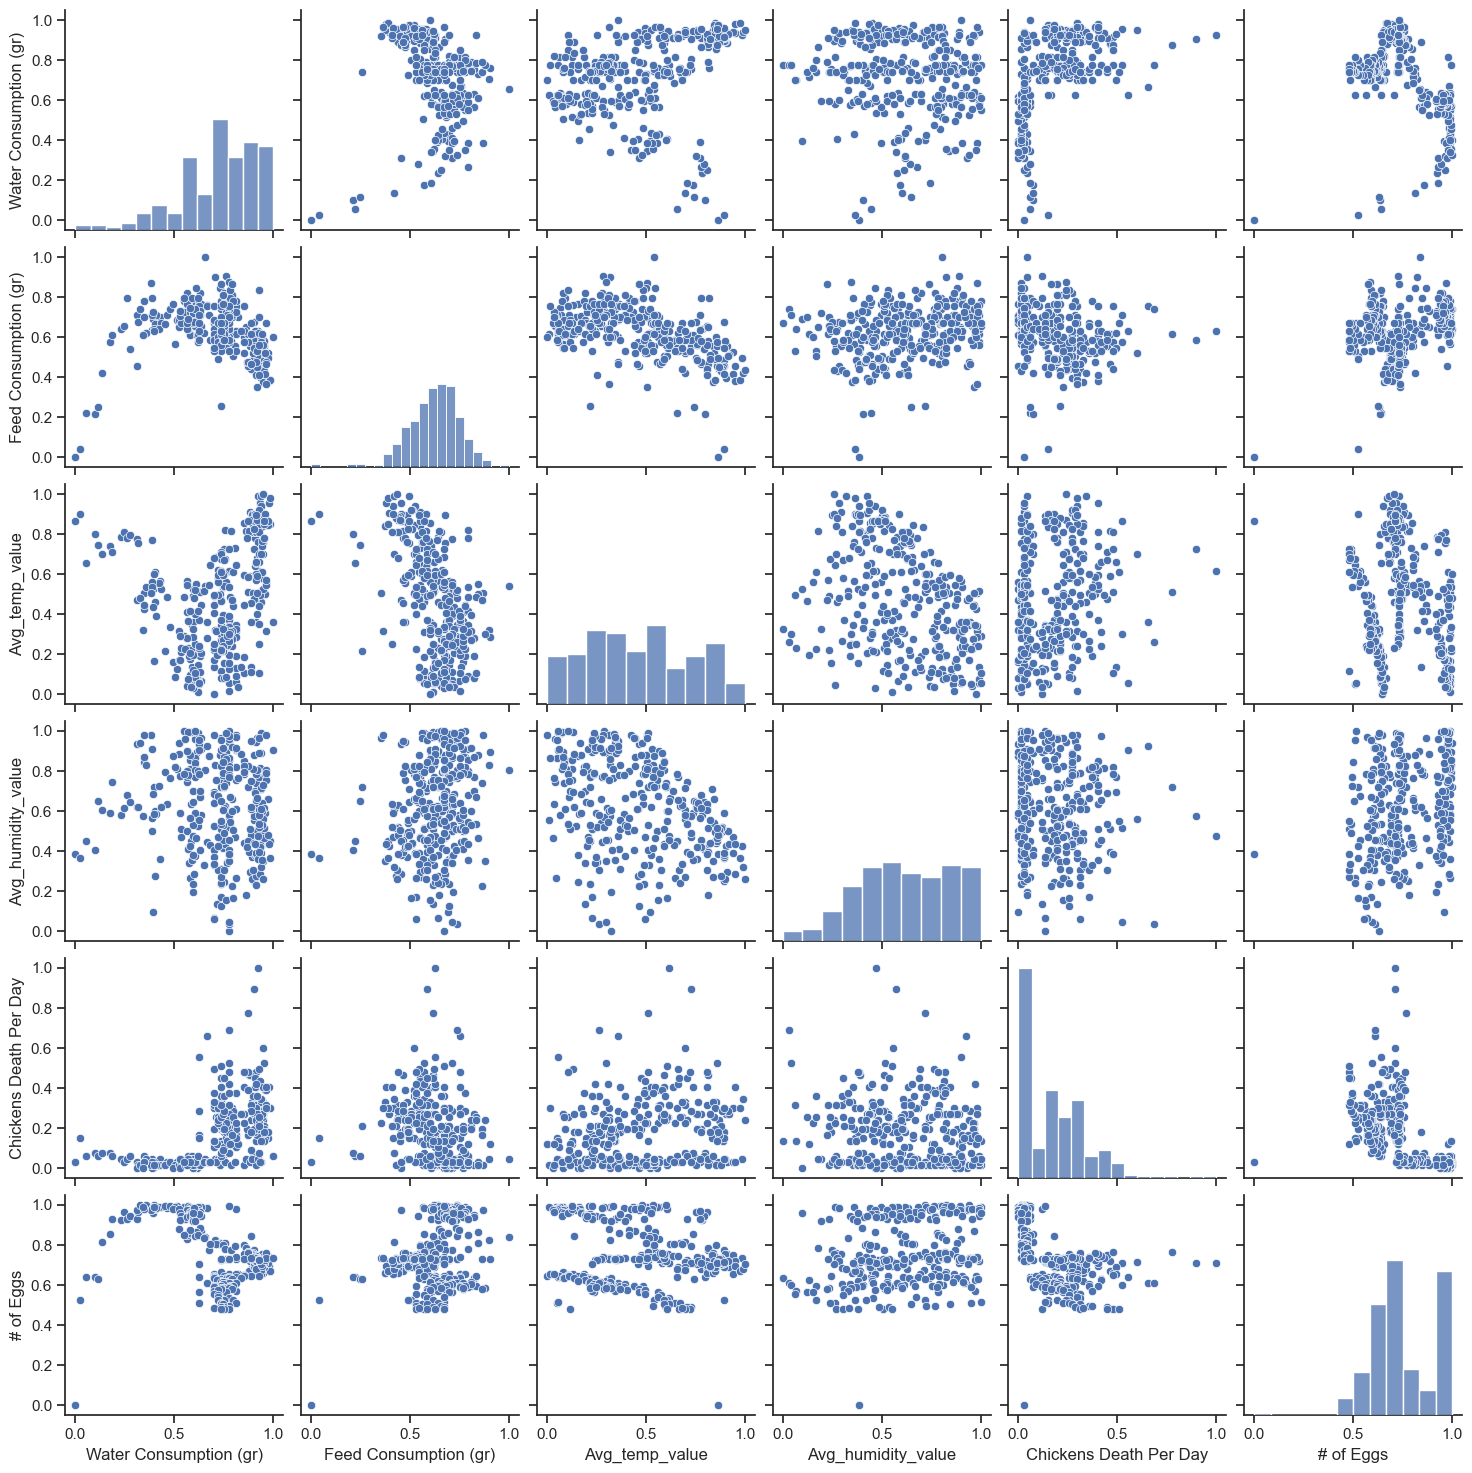

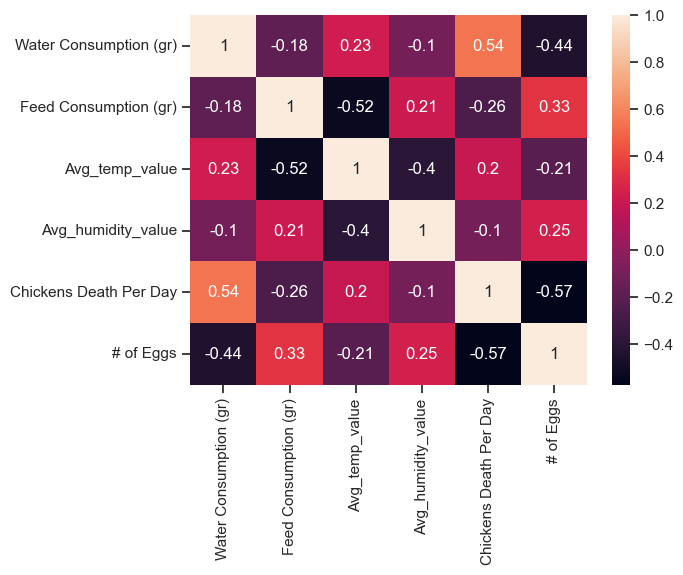

In [12]:
# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(temp_hum_chickens_a[input_features + output_features])
plt.show()

# heatmap cycle A
sns.heatmap(temp_hum_chickens_a[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle B

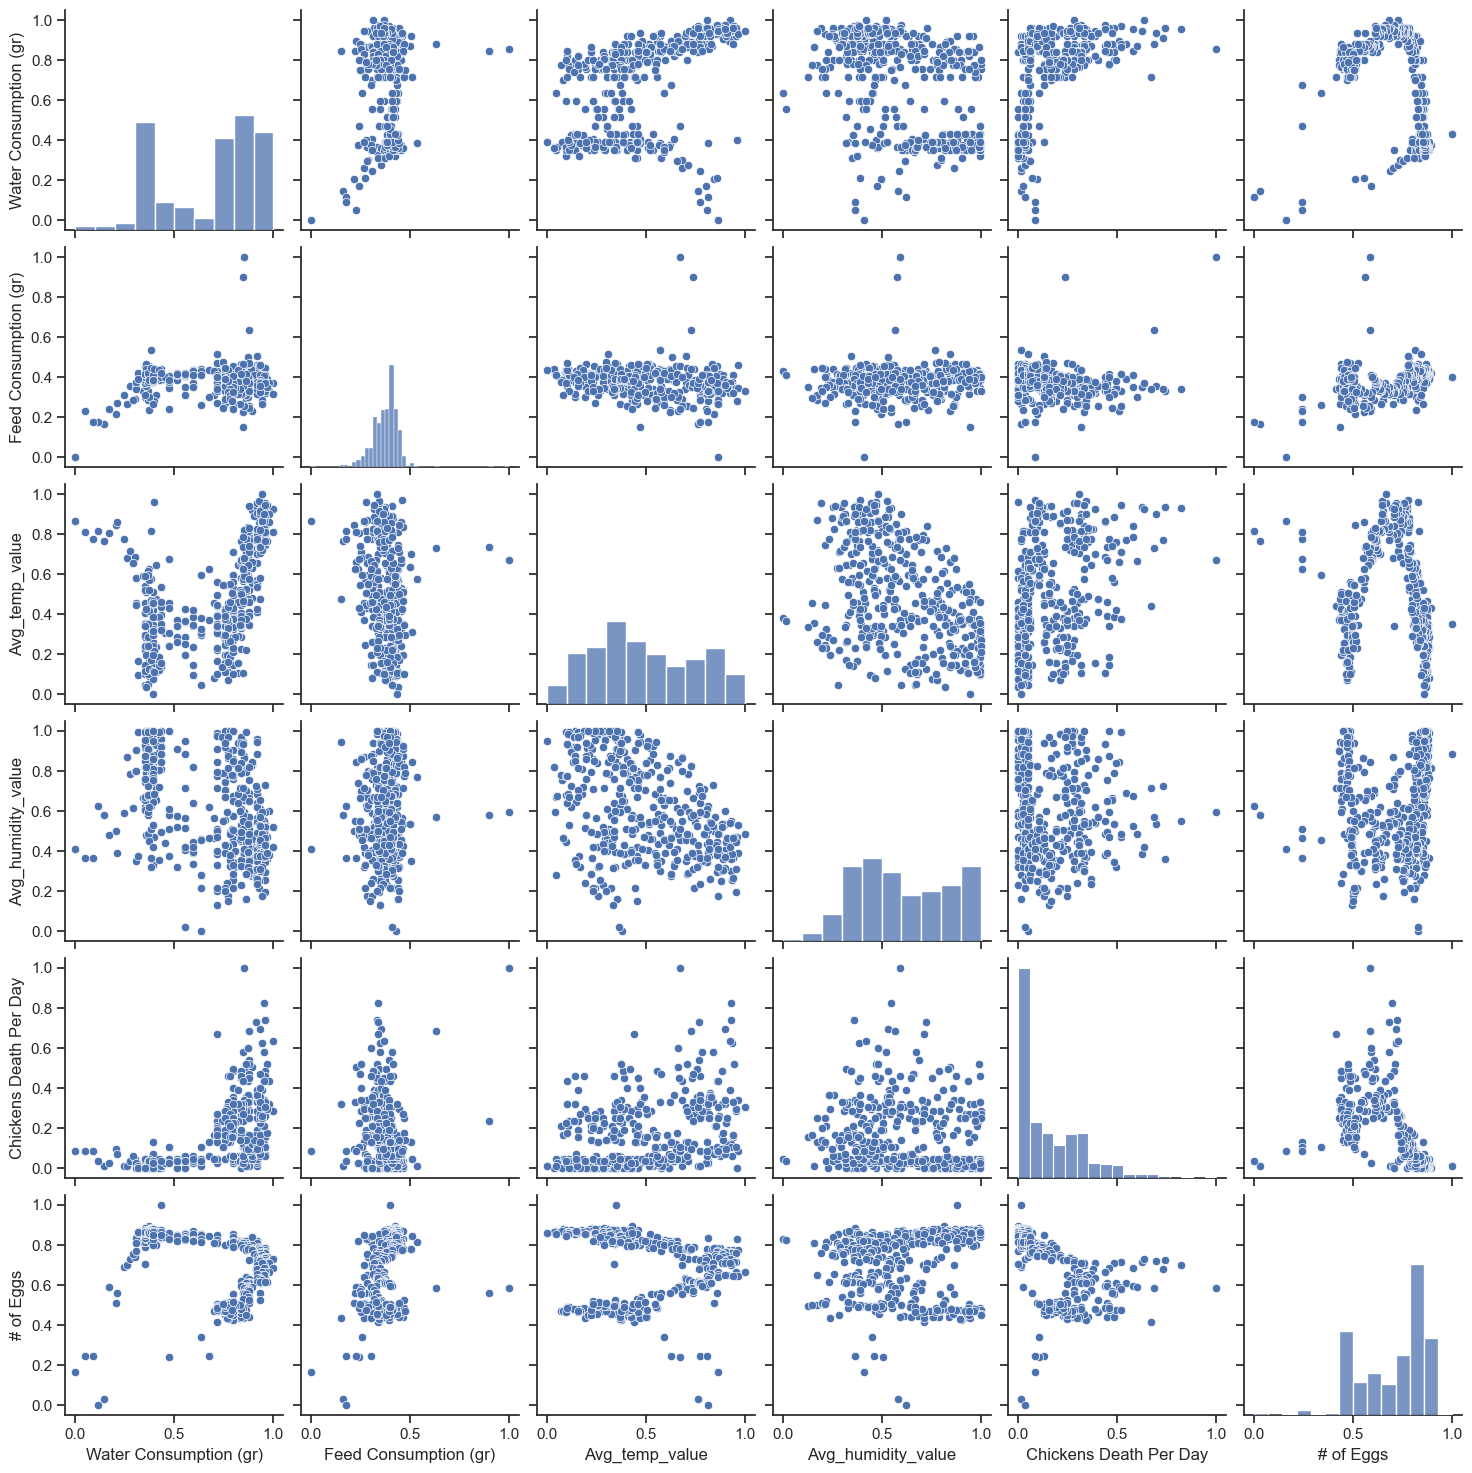

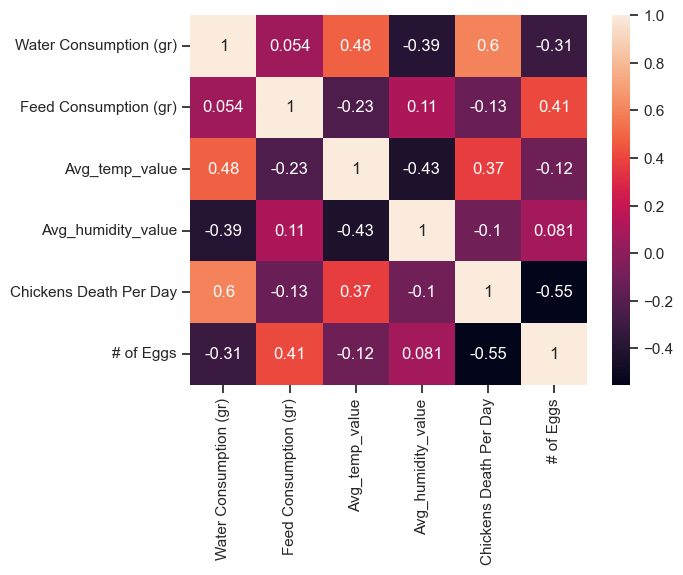

In [13]:
# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(temp_hum_chickens_b[input_features + output_features])
plt.show()

# heatmap cycle B
sns.heatmap(temp_hum_chickens_b[input_features + output_features].corr(), annot=True)
plt.show()

### Cycle Z

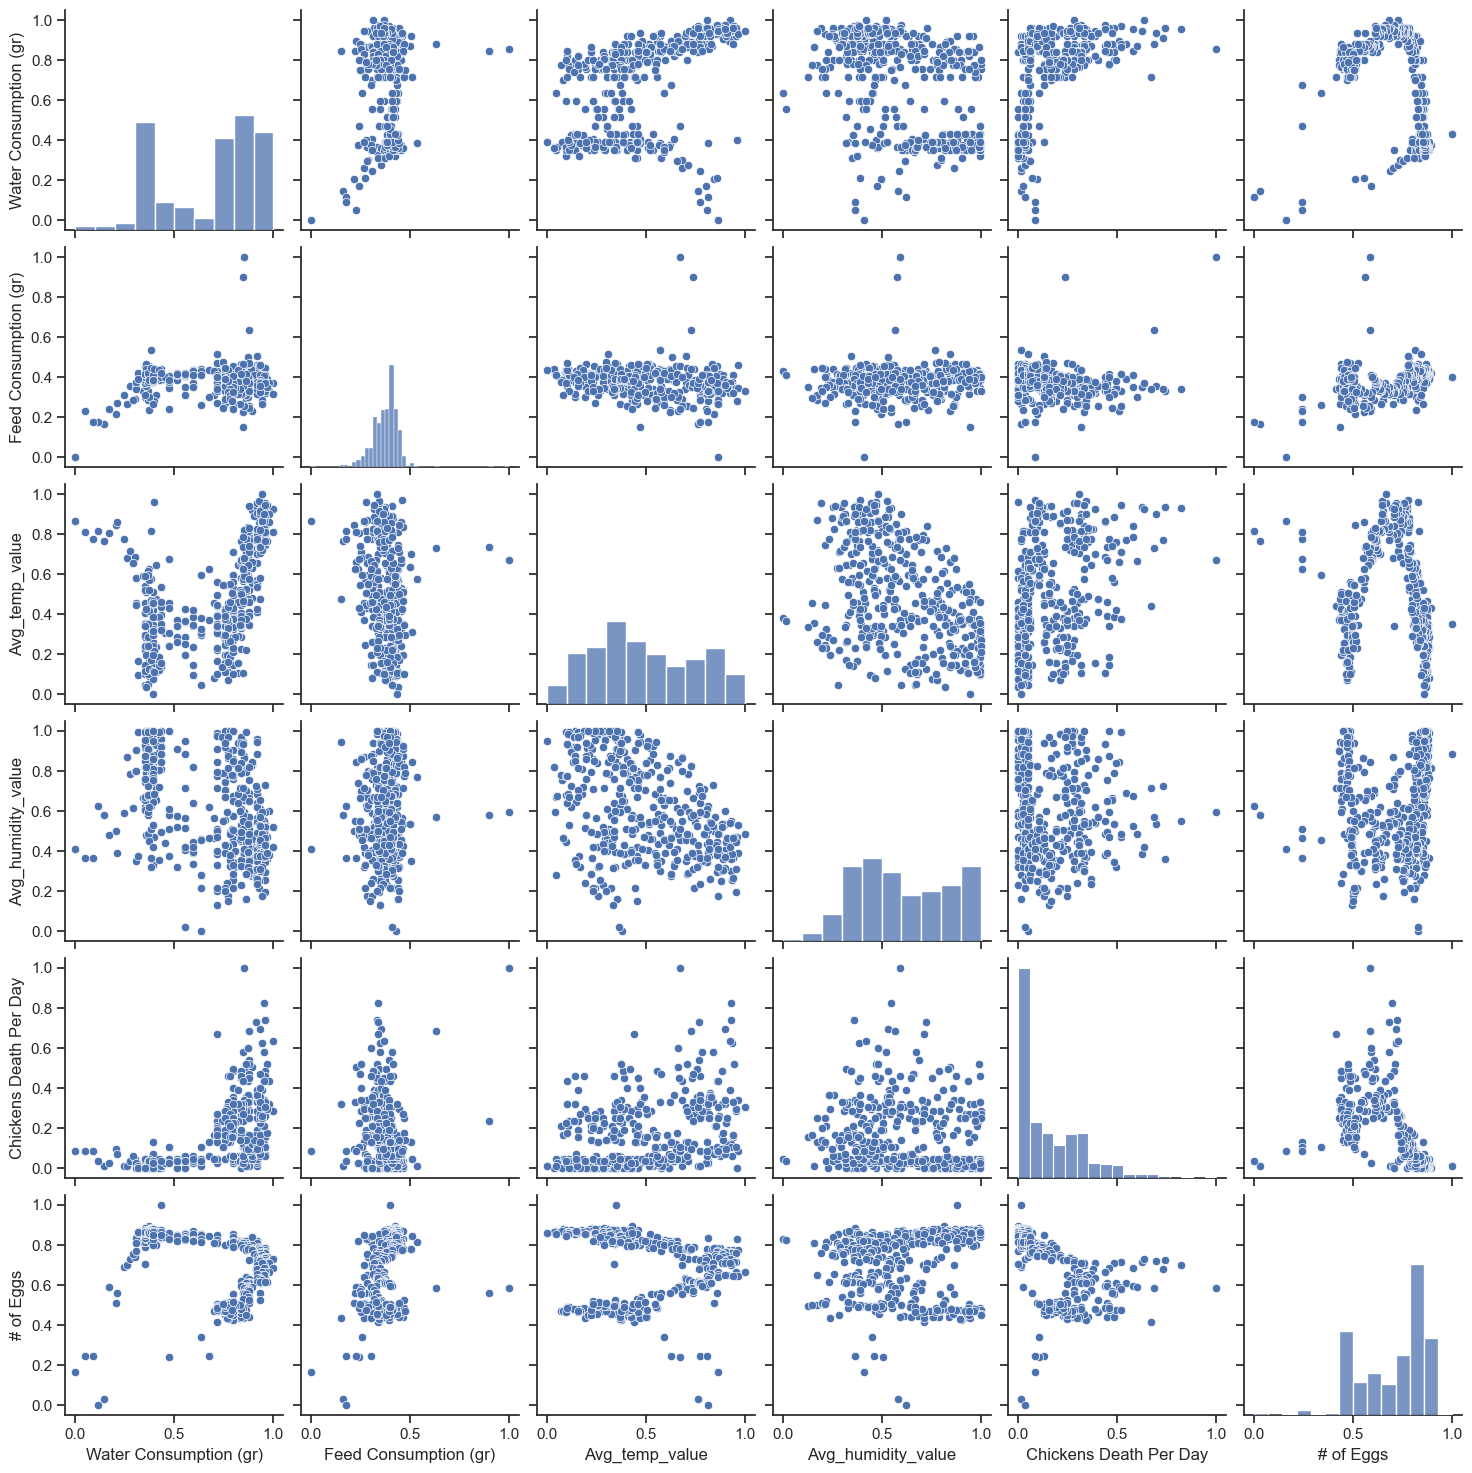

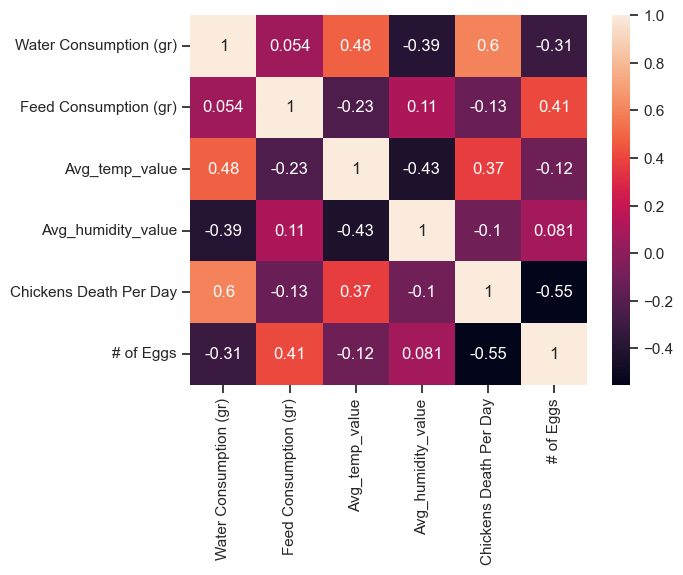

In [14]:
# pair plot cycle Z
sns.set(style="ticks", color_codes=True)
sns.pairplot(temp_hum_chickens_z[input_features + output_features])
plt.show()

# heatmap cycle Z
sns.heatmap(temp_hum_chickens_z[input_features + output_features].corr(), annot=True)
plt.show()